In [264]:
import seaborn as sb
import numpy as np
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from tensorflow.keras import datasets, layers, models
from keras.datasets import reuters
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000, test_split=0.3)

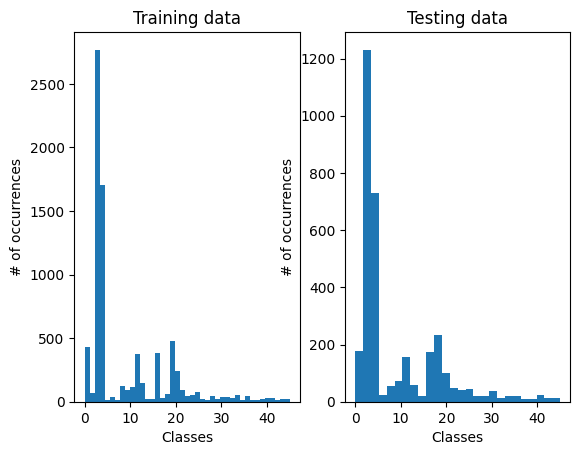

In [265]:
# Creating to two graphs showing the distributions of target classes for the train and test data
plt.figure(1)
plt.subplot(121)
plt.hist(train_labels, bins="auto")
plt.xlabel("Classes")
plt.ylabel("# of occurrences")
plt.title("Training data")

plt.subplot(122)
plt.hist(test_labels, bins="auto")
plt.xlabel("Classes")
plt.ylabel("# of occurrences")
plt.title("Testing data")
plt.show()

I am using this data set from the provided sample datasets through TensorFlow which I actually found on Kaggle too. This data set revolves around classifying news articles with 46 specific labels. The model should be able to predict what labels go with what article. 

In [266]:
print(test_labels.shape)
print(train_labels.shape)

(3369,)
(7859,)


In [267]:
WordIndex = reuters.get_word_index(path="reuters_word_index.json")

IndexToWord = {}

for key, value in WordIndex.items():
  IndexToWord[value] = key

MaxWords = 10000

Tok = Tokenizer(num_words = MaxWords)
x_train = Tok.sequences_to_matrix(train_data, mode="binary")
x_test = Tok.sequences_to_matrix(test_data, mode="binary")

NumClasses = max(train_labels) + 1

y_train = to_categorical(train_labels, NumClasses)
y_test = to_categorical(test_labels, NumClasses)

In [269]:
model = Sequential()
model.add(Dense(512, input_shape=(MaxWords, )))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(NumClasses))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [270]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
123/123 [==============================] - 24s 197ms/step - loss: 1.4400 - accuracy: 0.6959 - val_loss: 0.9741 - val_accuracy: 0.7812
Epoch 2/10
123/123 [==============================] - 25s 204ms/step - loss: 0.5685 - accuracy: 0.8716 - val_loss: 0.8266 - val_accuracy: 0.8094
Epoch 3/10
123/123 [==============================] - 23s 186ms/step - loss: 0.3135 - accuracy: 0.9318 - val_loss: 0.8215 - val_accuracy: 0.8130
Epoch 4/10
123/123 [==============================] - 24s 191ms/step - loss: 0.2326 - accuracy: 0.9432 - val_loss: 0.8703 - val_accuracy: 0.8050
Epoch 5/10
123/123 [==============================] - 26s 211ms/step - loss: 0.1919 - accuracy: 0.9539 - val_loss: 0.9243 - val_accuracy: 0.8100
Epoch 6/10
123/123 [==============================] - 22s 181ms/step - loss: 0.1620 - accuracy: 0.9566 - val_loss: 0.9331 - val_accuracy: 0.8080
Epoch 7/10
123/123 [==============================] - 24s 194ms/step - loss: 0.1593 - accuracy: 0.9575 - val_loss: 0.9728 - val_ac

In [271]:
losses_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print(losses_and_metrics)

27/27 [==============================] - 2s 56ms/step - loss: 0.9963 - accuracy: 0.8005
[0.9962863922119141, 0.8005343079566956]


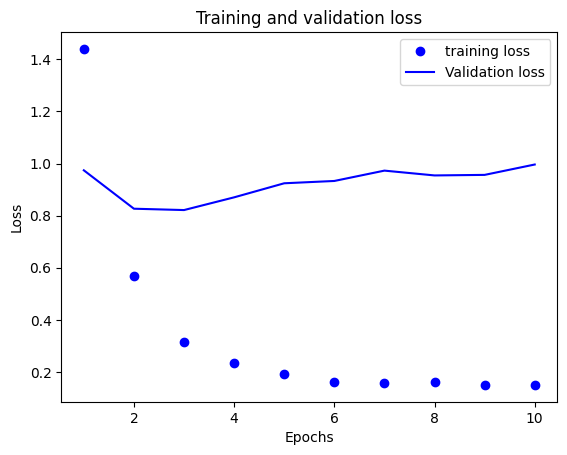

In [272]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.clf()

plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

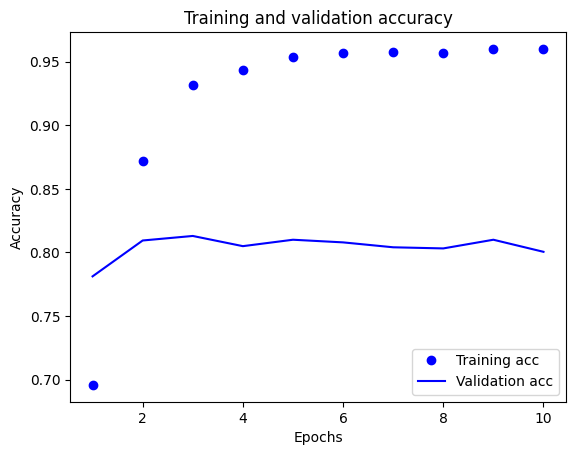

In [273]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

Moving on to the RNN architecture.

In [274]:
from tensorflow.keras import preprocessing

x_train = preprocessing.sequence.pad_sequences(train_data, maxlen=500)
x_test = preprocessing.sequence.pad_sequences(test_data, maxlen=500)

In [275]:
y_train = to_categorical(train_labels, 46)
y_test = to_categorical(test_labels, 46)

In [276]:
model = Sequential()
model.add(layers.Embedding(10000, 64))
model.add(layers.SimpleRNN(64, return_sequences=True))
model.add(layers.SimpleRNN(64, return_sequences=True))
model.add(layers.SimpleRNN(64, return_sequences=True))
model.add(layers.SimpleRNN(64))
model.add(layers.Dense(46, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [277]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.9/dist-packages/keras/backend.py", line 5160, in <genexpr>
    ta.write(ta_index_to_write, out)  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


43/43 [==============================] - 450s 9s/step - loss: 2.7609 - accuracy: 0.2889 - val_loss: 2.3408 - val_accuracy: 0.3643
Epoch 2/10
43/43 [==============================] - 361s 8s/step - loss: 2.2727 - accuracy: 0.3957 - val_loss: 2.1741 - val_accuracy: 0.4283
Epoch 3/10
43/43 [==============================] - 360s 8s/step - loss: 1.8532 - accuracy: 0.5328 - val_loss: 2.1288 - val_accuracy: 0.4572
Epoch 4/10
43/43 [==============================] - 369s 9s/step - loss: 1.4083 - accuracy: 0.6517 - val_loss: 2.1966 - val_accuracy: 0.4610
Epoch 5/10
43/43 [==============================] - 369s 9s/step - loss: 1.0262 - accuracy: 0.7604 - val_loss: 2.0393 - val_accuracy: 0.5233
Epoch 6/10
43/43 [==============================] - 358s 8s/step - loss: 0.7506 - accuracy: 0.8251 - val_loss: 2.3557 - val_accuracy: 0.4686
Epoch 7/10
43/43 [==============================] - 369s 9s/step - loss: 0.5583 - accuracy: 0.8777 - val_loss: 2.3513 - val_accuracy: 0.4894
Epoch 8/10
43/43 [======

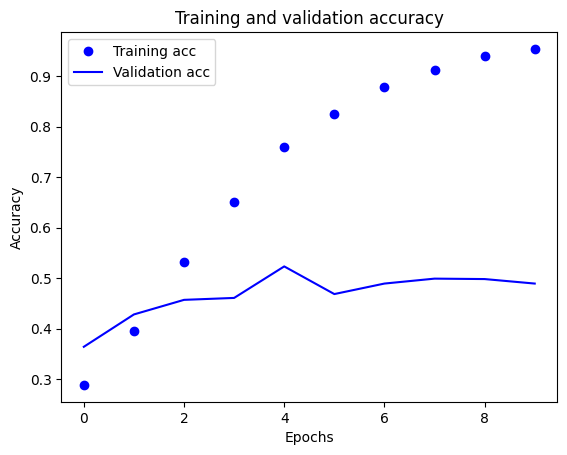

In [278]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

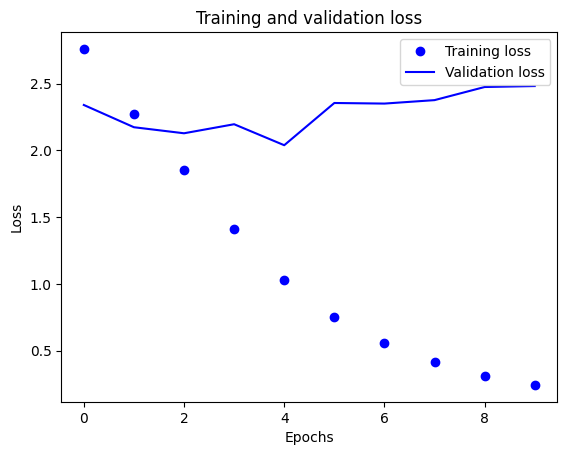

In [280]:
plt.clf()

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

On to the embedding architecture.

In [281]:
x_train = preprocessing.sequence.pad_sequences(train_data, maxlen=20)
x_test = preprocessing.sequence.pad_sequences(test_data, maxlen=20)

In [282]:
model = models.Sequential()
model.add(layers.Embedding(10000, 8, input_length=20))
model.add(layers.Flatten())
model.add(layers.Dense(46, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [283]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
  1/197 [..............................] - ETA: 11s - loss: 3.8302 - accuracy: 0.0000e+00

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


197/197 [==============================] - 8s 40ms/step - loss: 3.1331 - accuracy: 0.3587 - val_loss: 2.2881 - val_accuracy: 0.3740
Epoch 2/10
197/197 [==============================] - 8s 40ms/step - loss: 2.1488 - accuracy: 0.4352 - val_loss: 2.0149 - val_accuracy: 0.4892
Epoch 3/10
197/197 [==============================] - 8s 39ms/step - loss: 1.9717 - accuracy: 0.4810 - val_loss: 1.9219 - val_accuracy: 0.4898
Epoch 4/10
197/197 [==============================] - 8s 38ms/step - loss: 1.8687 - accuracy: 0.4926 - val_loss: 1.8610 - val_accuracy: 0.5064
Epoch 5/10
197/197 [==============================] - 8s 41ms/step - loss: 1.7854 - accuracy: 0.5203 - val_loss: 1.8164 - val_accuracy: 0.5254
Epoch 6/10
197/197 [==============================] - 8s 40ms/step - loss: 1.7122 - accuracy: 0.5502 - val_loss: 1.7820 - val_accuracy: 0.5439
Epoch 7/10
197/197 [==============================] - 9s 44ms/step - loss: 1.6456 - accuracy: 0.5747 - val_loss: 1.7536 - val_accuracy: 0.5483
Epoch 8/10

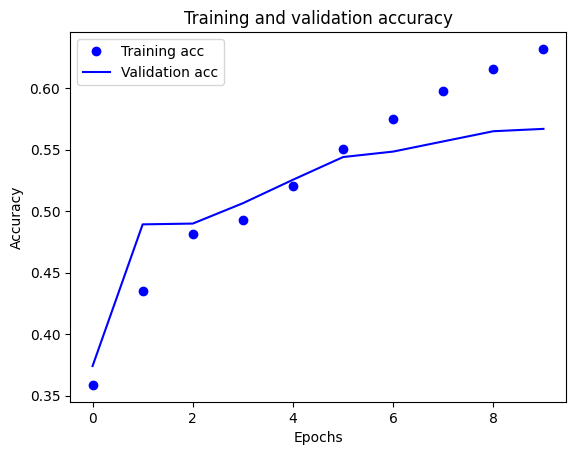

In [284]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

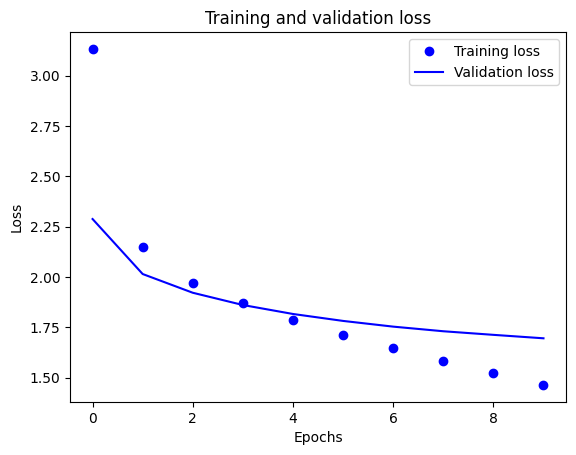

In [285]:
plt.clf()

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

From the three different methods tested, those being a sequential model, RNN, and an embedded approach, the sequential model scored the highest with RNN behind it and the embedded approach at the lowest. The sequential model did not take too much time to compile and it gave a good accuracy over the 10 epochs tested. RNN took about an hour to compile which I believe is due to the amount of layers put on the model. However, I do not believe its accuracy would be as high as a result. And finally, the embedded approach did not provide a good accuracy compared to the other two. So for me, the sequential model would be the preffered option when it comes to text classification.